Using TensorFlow backend.
/data/xai/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/xai/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/xai/xai-genz/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/xai/xai-genz/venv/lib/python3.6/site-packages/t

10000 test samples


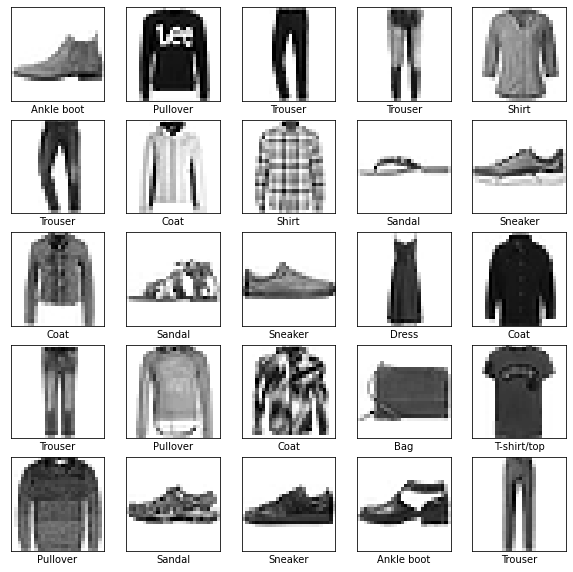

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(_, _), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')
x_test /= 255

print(x_test.shape[0], 'test samples')

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(img_rows, img_cols), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [2]:
from keras.models import load_model

model = load_model('fashion_mnist-gs.h5')
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)            

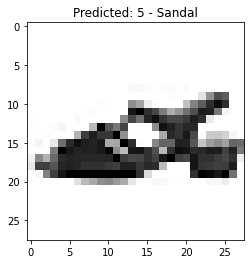

In [3]:
import random

random_idx = random.choice(range(len(x_test)))
to_explain_img = x_test[random_idx]
to_explain_label = int(y_test[random_idx])

plt.figure()
plt.title(f'Predicted: {to_explain_label} - {class_names[to_explain_label]}')
plt.imshow(to_explain_img.reshape(img_rows, img_cols), cmap=plt.cm.binary)
plt.grid(False)
plt.show()

# SHAP - GRADIENT EXPLAINER

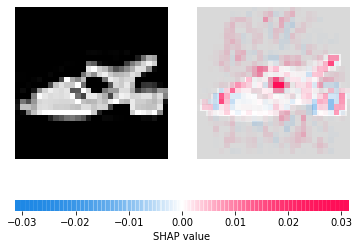

In [4]:
import shap

# since we have two inputs we pass a list of inputs to the explainer
explainer = shap.GradientExplainer(model, x_test)

# we explain the model's predictions on the first three samples of the test set
# shap_values = explainer.shap_values([x_test[:3], x_test[:3]])
shap_values = explainer.shap_values(np.array([to_explain_img]))
shap.image_plot(shap_values[to_explain_label], to_explain_img.reshape(1, 28, 28).astype('float'))

Predicion - 9 Sandal


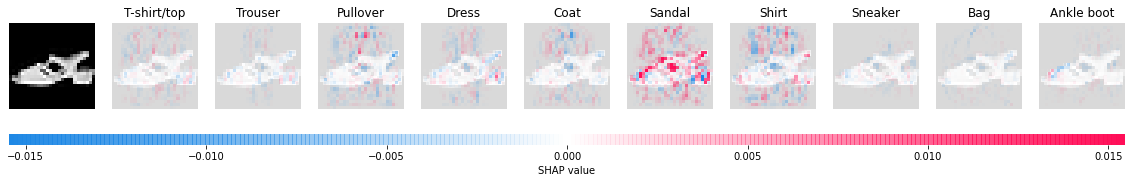

In [5]:
print(f'Predicion - {y_test[0]} {class_names[to_explain_label]}')
# here we plot the explanations for all classes for the first input (this is the feed forward input)
shap.image_plot([shap_values[i] for i in range(len(class_names))], to_explain_img.reshape(1, 28, 28).astype('float'),
               labels=np.array(class_names).reshape(1, len(class_names)))